# Algorithm & Metric Deep Dive - Making appropriate choices for your problem

## Overview 

In the previous notebook, we built a machine learning containing all the important elements we would find in any sophisticated, real world pipeline, but in our example we used quite simple components for each step. Even still, there were quite a number of *hyperparameters* we had to choose along the way, without having understood what we were choosing and why, or more importantly, what would be a good choice for our particular problem and the dataset. This notebook will attempt to give a little insight into how key ML algorithms work with aim of giving some basic understanding of what the hyperparameters mean and how they influence the end result. This will hopefully be a starting point for making approproate chopices of algorithm, hyperparamters and metrics. 


### Prerequisites
* Completed notebooks 1 & 2

### Learning Outcomes 

* Understand mechanisms of key tree based and neural network algorithms
* Understand key hyperparameters and how to choose them
* Understand key metrics and how to select the right one for your problem

### Links to Best practices and Values
* ML Pitfalls - Avoid problems such as overfitting and underfitting through appropriate choice of algorithms and hyperparameters
* Ethics - Be able to justify your choices for what you have implemented.
* ML Lifecycle - Ensure you are able to reproduce results


### Data Science Framework
* Weather regimes - Discovery and Attribution
* Radiation emulation - Fusing Simulation and Data Science
* XBT - Uncertainty and Trust
* Rotors - Data to Decisions

## Tutorial - Decision Trees
Decision trees


Root node: The base of the decision tree.
Splitting: The process of dividing a node into multiple sub-nodes.
Decision node: When a sub-node is further split into additional sub-nodes.
Leaf node: When a sub-node does not further split into additional sub-nodes; represents possible outcomes.
Pruning: The process of removing sub-nodes of a decision tree.
Branch: A subsection of the decision tree consisting of multiple nodes.
Hyoerparameters
Max depth
Image of tree https://miro.medium.com/max/1400/1*3P1333UmqEww6YMpjisj4Q.png from article https://towardsdatascience.com/decision-trees-explained-3ec41632ceb6 

Maths of CART algorithm

https://towardsdatascience.com/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3
How does this relate to decision trees hyperparameters

In the decision tree, the nodes are split into subnodes on the basis of a threshold value of an attribute. The CART algorithm does that by searching for the best homogeneity for the subnodes, with the help of the Gini Index criterion. 
Quote from https://www.analyticssteps.com/blogs/classification-and-regression-tree-cart-algorithm  
Training terms
* Greedy algorithm
* Stopping criteria
* Pruning

Use XBT example for trees
Show XBT flowchart
Example code
Régression va classification trees

Décision tree visualisation
Variants:
• random forest
• Gradient boosted
• Xgboost 
Random forest discussion 
Deals with variance Leo breiman
Key terms
Bgging
Bootstapping
aggregation
Ensemble model


Advantages

Works for numerical or categorical data and variables.
Models problems with multiple outputs.
Tests the reliability of the tree.
Requires less data cleaning than other data modeling techniques. Easy to explain to those without an analytical background.

Disadvantages
Affected by noise in the data.
Not ideal for large datasets.
Can disproportionately value, or weigh, attributes.
The decisions at nodes are limited to binary outcomes, reducing the complexity that the tree can handle. Trees can become very complex when dealing with uncertainty and numerous linked outcomes. 




# Example: Decision Trees - XBT classification

In [2]:
import pathlib

In [15]:
import pandas
import numpy

In [63]:
import matplotlib
import matplotlib.pyplot
%matplotlib inline

In [5]:
import sklearn
import sklearn.tree
import sklearn.preprocessing

In [7]:
xbt_data_loc = pathlib.Path('/project/informatics_lab/xbt')
xbt_fname_template = 'xbt_{year}.csv'
year_range= (1966,2015)
xbt_df = pandas.concat([pandas.read_csv(xbt_data_loc / xbt_fname_template.format(year=year1)) for year1 in range(year_range[0], year_range[1])])
xbt_df

,Unnamed: 0,country,lat,lon,date,year,month,day,institute,platform,cruise_number,instrument,model,manufacturer,max_depth,imeta_applied,id
0,0,UNITED STATES,32.966667,-117.633331,19660412,1966,4,12,US NAVY SHIPS OF OPPORTUNITY,KEARSARGE,US044120,XBT: T4 (SIPPICAN),T4,SIPPICAN,466.892670,1,2052528
1,1,UNITED STATES,33.016666,-118.116669,19660413,1966,4,13,US NAVY SHIPS OF OPPORTUNITY,KEARSARGE,US044120,XBT: T4 (SIPPICAN),T4,SIPPICAN,466.852051,1,2052529
2,2,UNITED STATES,33.066666,-118.466667,19660414,1966,4,14,US NAVY SHIPS OF OPPORTUNITY,KEARSARGE,US044120,XBT: T4 (SIPPICAN),T4,SIPPICAN,70.602089,1,2052530
3,3,UNITED STATES,32.700001,-118.666664,19660414,1966,4,14,US NAVY SHIPS OF OPPORTUNITY,KEARSARGE,US044120,XBT: T4 (SIPPICAN),T4,SIPPICAN,466.907410,1,2052531
4,4,UNITED STATES,32.933334,-117.916664,19660414,1966,4,14,US NAVY SHIPS OF OPPORTUNITY,KEARSARGE,US044120,XBT: T4 (SIPPICAN),T4,SIPPICAN,466.811493,1,2052532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18995,18995,UNITED STATES,-58.394001,-63.181000,20141231,2014,12,31,0,LAURENCE M. GOULD (R/V; call sign WCX7445; bui...,US036605,XBT: DEEP BLUE (SIPPICAN),DEEP BLUE,SIPPICAN,899.722412,0,16686048
18996,18996,UNITED STATES,-58.500999,-63.125000,20141231,2014,12,31,0,LAURENCE M. GOULD (R/V; call sign WCX7445; bui...,US036605,XBT: DEEP BLUE (SIPPICAN),DEEP BLUE,SIPPICAN,929.809082,0,16686049
18997,18997,UNITED STATES,-58.598000,-63.064999,20141231,2014,12,31,0,LAURENCE M. GOULD (R/V; call sign WCX7445; bui...,US036605,XBT: DEEP BLUE (SIPPICAN),DEEP BLUE,SIPPICAN,908.195984,0,16686051
18998,18998,UNITED STATES,-58.681999,-63.015999,20141231,2014,12,31,0,LAURENCE M. GOULD (R/V; call sign WCX7445; bui...,US036605,XBT: DEEP BLUE (SIPPICAN),DEEP BLUE,SIPPICAN,914.778015,0,16686052


#### Clean dataset
Remove bad data points from the dataset.

In [40]:
xbt_df = xbt_df[~((xbt_df['max_depth'] < 0) | (xbt_df['max_depth'].isna()))]
xbt_df

,Unnamed: 0,country,lat,lon,date,year,month,day,institute,platform,cruise_number,instrument,model,manufacturer,max_depth,imeta_applied,id
0,0,UNITED STATES,32.966667,-117.633331,19660412,1966,4,12,US NAVY SHIPS OF OPPORTUNITY,KEARSARGE,US044120,XBT: T4 (SIPPICAN),T4,SIPPICAN,466.892670,1,2052528
1,1,UNITED STATES,33.016666,-118.116669,19660413,1966,4,13,US NAVY SHIPS OF OPPORTUNITY,KEARSARGE,US044120,XBT: T4 (SIPPICAN),T4,SIPPICAN,466.852051,1,2052529
2,2,UNITED STATES,33.066666,-118.466667,19660414,1966,4,14,US NAVY SHIPS OF OPPORTUNITY,KEARSARGE,US044120,XBT: T4 (SIPPICAN),T4,SIPPICAN,70.602089,1,2052530
3,3,UNITED STATES,32.700001,-118.666664,19660414,1966,4,14,US NAVY SHIPS OF OPPORTUNITY,KEARSARGE,US044120,XBT: T4 (SIPPICAN),T4,SIPPICAN,466.907410,1,2052531
4,4,UNITED STATES,32.933334,-117.916664,19660414,1966,4,14,US NAVY SHIPS OF OPPORTUNITY,KEARSARGE,US044120,XBT: T4 (SIPPICAN),T4,SIPPICAN,466.811493,1,2052532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18995,18995,UNITED STATES,-58.394001,-63.181000,20141231,2014,12,31,0,LAURENCE M. GOULD (R/V; call sign WCX7445; bui...,US036605,XBT: DEEP BLUE (SIPPICAN),DEEP BLUE,SIPPICAN,899.722412,0,16686048
18996,18996,UNITED STATES,-58.500999,-63.125000,20141231,2014,12,31,0,LAURENCE M. GOULD (R/V; call sign WCX7445; bui...,US036605,XBT: DEEP BLUE (SIPPICAN),DEEP BLUE,SIPPICAN,929.809082,0,16686049
18997,18997,UNITED STATES,-58.598000,-63.064999,20141231,2014,12,31,0,LAURENCE M. GOULD (R/V; call sign WCX7445; bui...,US036605,XBT: DEEP BLUE (SIPPICAN),DEEP BLUE,SIPPICAN,908.195984,0,16686051
18998,18998,UNITED STATES,-58.681999,-63.015999,20141231,2014,12,31,0,LAURENCE M. GOULD (R/V; call sign WCX7445; bui...,US036605,XBT: DEEP BLUE (SIPPICAN),DEEP BLUE,SIPPICAN,914.778015,0,16686052


In [21]:
target_feature = 'instrument'

In [46]:
xbt_df[target_feature].value_counts()

XBT: T4 (SIPPICAN)                                                        1098063
XBT: T7 (SIPPICAN)                                                         336410
XBT: DEEP BLUE (SIPPICAN)                                                  335250
XBT: T4 (TSK - TSURUMI SEIKI Co.)                                          172036
XBT: T10 (SIPPICAN)                                                         88428
XBT: T6 (TSK - TSURUMI SEIKI Co.)                                           51424
XBT: T7 (UNKNOWN BRAND)                                                     41311
XBT: T7 (TSK - TSURUMI SEIKI Co.)                                           26631
XBT: T4 (UNKNOWN BRAND)                                                     23729
XBT: T5 (SIPPICAN)                                                          22365
XBT: T6 (SIPPICAN)                                                           7780
XBT: T5 (TSK - TSURUMI SEIKI Co.)                                            6926
XBT: FAST DEEP (

In [47]:
xbt_df = xbt_df[~(xbt_df[target_feature].str.contains('UNKNOWN'))]
xbt_df.shape

(2157559, 17)

In [48]:
xbt_labelled = xbt_df[xbt_df['imeta_applied'] == 0]
xbt_unlabelled = xbt_df[xbt_df['imeta_applied'] != 0]

In [49]:
xbt_labelled.shape

(1122672, 17)

In [50]:
xbt_unlabelled.shape

(1034887, 17)

In [51]:
xbt_train, xbt_test = sklearn.model_selection.train_test_split(xbt_labelled)

In [52]:
scaler_dict = {
    'year': sklearn.preprocessing.MinMaxScaler(),
    'max_depth': sklearn.preprocessing.MinMaxScaler(),
    'lat': sklearn.preprocessing.MinMaxScaler(),
    'lon': sklearn.preprocessing.MinMaxScaler(),
}
input_features = [list(scaler_dict.keys())]

preproc_input_features = []
for feature_name, scaler1 in scaler_dict.items():
    scaler1.fit(xbt_train[[feature_name]])
    preproc_input_features += [scaler1.transform(xbt_train[[feature_name]])]
    
X_train = numpy.concatenate( preproc_input_features, axis=1)



In [56]:
target_encoder = sklearn.preprocessing.LabelEncoder()
target_encoder.fit(xbt_train[target_feature])
y_train = target_encoder.transform(xbt_train[target_feature])

We can get the hyperparameters for our decision tree by creating a decision tree object. You can get more explanation from `help(sklearn.tree.DecisionTreeClassifier`, or from the [scikit-learn docs](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier).

In [54]:
sklearn.tree.DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [57]:
dt_clf = sklearn.tree.DecisionTreeClassifier(
    max_depth=5, # reduce chance of overfitting
    min_samples_leaf= 2, #ensure that there won't be too small a number of samples in a leaf node
    min_samples_split= 5, # ensure more sample at a node when it splits
)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5)

https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py

[Text(167.4, 199.32, 'X[1] <= 0.078\ngini = 0.712\nsamples = 842004\nvalue = [89, 355, 249059, 766, 3751, 15, 32776, 42, 394\n339903, 5848, 12090, 1573, 5857, 12808, 157124, 15699\n6, 324, 81, 3, 146, 112, 104, 1, 167, 2911]'),
 Text(83.7, 163.07999999999998, 'X[0] <= 0.51\ngini = 0.441\nsamples = 457222\nvalue = [89, 255, 14524, 14, 278, 12, 32171, 42, 343, 336874\n5814, 1846, 453, 5627, 11662, 44244, 1661, 6, 324, 8\n3, 128, 112, 37, 1, 165, 529]'),
 Text(41.85, 126.83999999999999, 'X[1] <= 0.03\ngini = 0.201\nsamples = 348772\nvalue = [0, 0, 41, 0, 0, 0, 19937, 0, 324, 310764, 1303\n566, 0, 126, 21, 15565, 9, 0, 0, 0, 0, 0, 0, 0\n0, 0, 116]'),
 Text(20.925, 90.6, 'X[3] <= 0.319\ngini = 0.517\nsamples = 62016\nvalue = [0, 0, 10, 0, 0, 0, 19761, 0, 152, 38146, 150, 95\n0, 92, 0, 3592, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0\n17]'),
 Text(10.4625, 54.359999999999985, 'X[0] <= 0.198\ngini = 0.562\nsamples = 37243\nvalue = [0, 0, 4, 0, 0, 0, 19180, 0, 128, 15279, 0, 48\n0, 64, 0, 2536, 1, 0, 0, 0, 

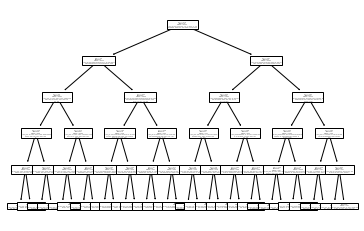

In [64]:

sklearn.tree.plot_tree(dt_clf)
matplotlib.pyplot.show()

In [ ]:
# visualise branches of decision tree

In [ ]:
# train random forest


In [4]:
# look at internal of random forest (number of trees, bags etc.)

In [ ]:
# evaluate results from random forest and decision tree

## Tutorial - Neural Networks

Description of Neural networks
* Explain a single perceptron
* History
* Weighted sum plus threshold (binary activation)
* Non linear activation, sigmoid neuron

Key terms
* neuron
* Perceptron
* Activation
* Weights
* Bias - the constant term
* Sigmoid function

Multi layer
* How are they joined together?

How do we train? 
* Gradient descent
* Stochastic gradient decscent
* Back propagation 

Key terms
* gradient descent
* Learning rate
* back propagation
* mini batch
* epoch
* copst function

Hyperparameters
* batch size
* learning rate
* solver
* maximum iterations

 
Types of NN
* feed forward
* Convolutional Neural Network
* Recurrent Neural Network
* Graphical Neural Network
 

## Example - Scorates Radiation Model Emulation

Explain problem and dataset

In [ ]:
# load in scorates data

In [ ]:
# prepreprroces

In [ ]:
# train test split??

In [2]:
# construct FF architecture

In [ ]:
# train NN

In [ ]:
# evaluate

In [ ]:
# train 1D CNN

In [ ]:
# evaluate and compare

In [ ]:
# load rotors data

In [ ]:
# clean, preprocess, split based on year

In [ ]:
# create LSTM

In [ ]:
# train LSTM

In [3]:
# evaluate (compare to previous notebook results)

## Tutorial - Metrics


Description of metrics
* classification metrics
* regression metrics

## Excercise - Metrics
xx


## Examples of use
xx


## Next steps
Rotor Challenge
Radiation emulation




## Dataset Info
* XBT Data
* Radiation Emulation
* Rotors

## References


Decision trees
* https://www.mastersindatascience.org/learning/introduction-to-machine-learning-algorithms/decision-tree/#:~:text=A
* https://towardsdatascience.com/decision-trees-explained-3ec41632ceb6
* 

Neural Networks
* [Introduction to Neural Networks - Kaggle](https://www.kaggle.com/code/carlosaguayo/introduction-to-neural-networks/notebook)
* [Back propagation - wikipedia](https://en.wikipedia.org/wiki/Backpropagation)
*[Back propagation - brilliant wiki](https://brilliant.org/wiki/backpropagation/#:~:text=Backpropagation%2C%20short%20for%20%22backward%20propagation,to%20the%20neural%20network's%20weights)
* [Introduction to Deep Learning - Kaggle](https://www.kaggle.com/learn/intro-to-deep-learning)
* [Introduction to Neural Networks - IBM](https://www.ibm.com/cloud/learn/neural-networks)
* [Neural Networks - MIT](https://news.mit.edu/2017/explained-neural-networks-deep-learning-0414)

* RNN
* CNN
* GNN

Metrics
* [Regression and Classification metrics - scikit-learn](https://scikit-learn.org/stable/modules/model_evaluation.html)
* 

